In [1]:
# 글꼴 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

## 중요도 컬럼 추가된 뉴스 - 리포트 유사도 확인
- 임베딩 모델 : snunlp/KR-SBERT-V40K-klueNLI-augSTS

In [2]:
import pandas as pd
# news_df, report_df 불러오기
news_df = pd.read_csv('/content/news_2023_2025_with_stock_impact.csv')
report_df = pd.read_csv('/content/report_2023_2025.csv')

In [3]:
news_df.head()

,news_id,wdate,title,article,press,url,image,text_combined,labels_by_id,stock_name,...,D-3,D-2,D-1,D+1,D+2,D+3,D+7,D+14,D+30,impact_score
0,20250523_0002,2025-05-23 18:52:00,"[단독] 카카오페이, 2500만 회원 쓱·스마일페이 품나…간편결제 시장 빅3 경쟁 후끈",매각가 5000억 안팎 달할듯\n결제시장 내 입지강화 포석\n카카오페이 [사진 = ...,매일경제,https://n.news.naver.com/mnews/article/009/000...,https://imgnews.pstatic.net/image/009/2025/05/...,"[단독] 카카오페이, 2500만 회원 쓱·스마일페이 품나…간편결제 시장 빅3 경쟁 ...",['카카오페이'],카카오페이,...,-3.57,-1.62,0.0,4.22,4.22,16.72,26.30,26.30,26.30,30.85
1,20250523_0004,2025-05-23 18:33:00,"골드만삭스 차기 CEO, 이재용·김병주·이창용 만났다",[사진=연합뉴스]\n세계 2위 투자은행(IB)인 골드만삭스의 사장 겸 최고운영책임자...,매일경제,https://n.news.naver.com/mnews/article/009/000...,https://imgnews.pstatic.net/image/009/2025/05/...,"골드만삭스 차기 CEO, 이재용·김병주·이창용 만났다 [사진=연합뉴스] 세계 2위 ...",['삼성전자'],삼성전자,...,2.77,0.92,0.0,0.92,0.92,-0.55,3.14,3.14,3.14,5.35
2,20250523_0005,2025-05-23 18:24:00,흔들리는 미국…달러 패권 붕괴에 '스테이블코인' 선택한 美,/사진=게티이미지뱅크\n미국 정부가 달러의 기축통화 지위를 위협하는 금에 대응하기 ...,머니투데이,https://n.news.naver.com/mnews/article/008/000...,https://imgnews.pstatic.net/image/008/2025/05/...,흔들리는 미국…달러 패권 붕괴에 '스테이블코인' 선택한 美 /사진=게티이미지뱅크 미...,['상상인증권'],상상인증권,...,2.47,-2.47,0.0,-1.24,-1.24,-4.12,8.66,8.66,8.66,16.70
3,20250523_0007,2025-05-23 18:00:00,[단독] 전자결제 강자 카카오페이 쓱·스마일 페이 인수 추진,국내 대표 전자결제사업자인 카카오페이가 신세계이마트 산하 간편결제사업부 인수에 나섰...,매일경제,https://n.news.naver.com/mnews/article/009/000...,https://ssl.pstatic.net/static.news/image/news...,[단독] 전자결제 강자 카카오페이 쓱·스마일 페이 인수 추진 국내 대표 전자결제사업...,['카카오페이'],카카오페이,...,-3.57,-1.62,0.0,4.22,4.22,16.72,26.30,26.30,26.30,30.85
4,20250523_0008,2025-05-23 17:58:00,“이 단기 실적 안 좋을 때 사야죠”...비행기 타기 전에 사둔다는 이 주식,큰장 기다리는 韓美 여행주\n시장점유율 1위 부킹홀딩스\n올 최고 유망주 익스피디아...,매일경제,https://n.news.naver.com/mnews/article/009/000...,https://imgnews.pstatic.net/image/009/2025/05/...,“이 단기 실적 안 좋을 때 사야죠”...비행기 타기 전에 사둔다는 이 주식 큰장 ...,"['호텔신라', '하나투어', '아시아나항공', '강원랜드', '대신증권', '대한...",호텔신라,...,-1.35,1.45,0.0,0.52,0.52,1.35,1.14,1.14,1.14,20.72


In [4]:
news_df.info()
print("===============================================")
report_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35198 entries, 0 to 35197
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   news_id        35198 non-null  object 
 1   wdate          35198 non-null  object 
 2   title          35198 non-null  object 
 3   article        35198 non-null  object 
 4   press          35198 non-null  object 
 5   url            35198 non-null  object 
 6   image          35198 non-null  object 
 7   text_combined  35198 non-null  object 
 8   labels_by_id   35198 non-null  object 
 9   stock_name     35198 non-null  object 
 10  종목코드           35198 non-null  int64  
 11  상장시가총액         35198 non-null  float64
 12  base_price     35198 non-null  float64
 13  D-30           35198 non-null  float64
 14  D-14           35198 non-null  float64
 15  D-7            35198 non-null  float64
 16  D-3            35198 non-null  float64
 17  D-2            35198 non-null  float64
 18  D-1   

In [5]:
pip install sentence-transformers

In [6]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer("snunlp/KR-SBERT-V40K-klueNLI-augSTS")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [7]:
# 임베딩
news_emb = model.encode(news_df['article'].tolist(), batch_size=64, show_progress_bar=True)
report_emb = model.encode(report_df['본문'].tolist(), batch_size=64, show_progress_bar=True)

# DataFrame에 embedding 컬럼으로 저장 (각 row에 np.ndarray 또는 list)
import numpy as np

news_df['embedding'] = list(news_emb)
report_df['embedding'] = list(report_emb)

Batches:   0%|          | 0/550 [00:00<?, ?it/s]

Batches:   0%|          | 0/271 [00:00<?, ?it/s]

In [8]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
from tqdm import tqdm
import pandas as pd

# 1. embedding matrix 추출
news_emb = np.stack(news_df['embedding'].values)
report_emb = np.stack(report_df['embedding'].values)

# 2. 코사인 유사도 계산
cos_sim = cosine_similarity(news_emb, report_emb)  # shape: (num_news, num_report)

# 3. 매칭 (유사도 기준, 날짜 기준 없이 상위 20개만)
all_matches = []

for i in tqdm(range(len(news_df))):
    sims = cos_sim[i]
    top20_idx = np.argsort(sims)[::-1][:20]
    for j in top20_idx:
        sim = sims[j]
        all_matches.append({
            'news_id': news_df.iloc[i]['news_id'],
            'wdate': news_df.iloc[i]['wdate'],
            'stock_name': news_df.iloc[i]['stock_name'],
            'news_title': news_df.iloc[i]['title'],
            'news_content': news_df.iloc[i]['article'],
            'report_id': report_df.iloc[j]['report_id'],
            '작성일': report_df.iloc[j]['작성일'],
            '종목명': report_df.iloc[j]['종목명'],
            'report_title': report_df.iloc[j]['제목'],
            'report_content': report_df.iloc[j]['본문'],
            'impact_score': news_df.iloc[i]['impact_score'],
            'sim': sim
        })

result_df = pd.DataFrame(all_matches)

100%|██████████| 35198/35198 [06:11<00:00, 94.82it/s] 


In [9]:
result_df['wdate'] = pd.to_datetime(result_df['wdate'])
result_df['작성일'] = pd.to_datetime(result_df['작성일'])

In [10]:
result_df['date_diff_days'] = (result_df['wdate'] - result_df['작성일']).dt.days

In [11]:
import numpy as np

# 0.00 ~ 1.00, 0.05 간격으로 bins 생성
bins = np.arange(0, 1.05, 0.05)
labels = [f"{round(b,2)}~{round(b+0.05,2)}" for b in bins[:-1]]

# sim_bin_05 컬럼 생성
result_df['sim_bin_05'] = pd.cut(result_df['sim'], bins=bins, labels=labels, include_lowest=True, right=False)

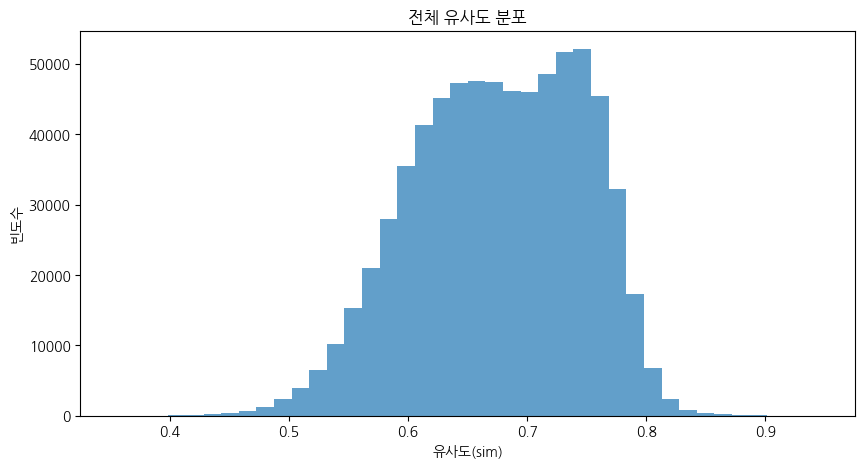

In [12]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(10, 5))
plt.hist(result_df['sim'], bins=40, alpha=0.7)
plt.xlabel('유사도(sim)')
plt.ylabel('빈도수')
plt.title('전체 유사도 분포')
plt.show()

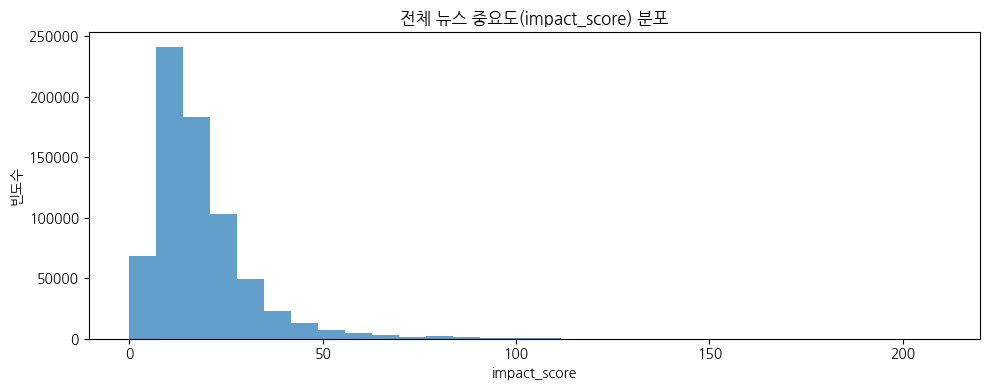

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.hist(result_df['impact_score'], bins=30, alpha=0.7)
plt.xlabel('impact_score')
plt.ylabel('빈도수')
plt.title('전체 뉴스 중요도(impact_score) 분포')
plt.tight_layout()
plt.show()

### 유사도 0.7~0.8 구간 EDA

In [14]:
sim_07_08_df = result_df[(result_df['sim'] >= 0.7) & (result_df['sim'] < 0.8)]
sim_07_08_df.sample(10)

,news_id,wdate,stock_name,news_title,news_content,report_id,작성일,종목명,report_title,report_content,impact_score,sim,date_diff_days,sim_bin_05
175270,20250113_0107,2025-01-13 09:19:00,LG화학,"IBK證 ""LG화학 4분기 실적 대규모 영업손실 기록할 듯…목표가↓""","목표주가 46만원→37만원\n""2389억원 영업손실 낼듯""\n사진 제공=LG화학\n...",20240201_0029,2024-02-01,LG생활건강,4Q23 Review: 낮아진 눈높이 상회,4Q23 Review: 낮아진 눈높이 상회\nLG생활건강의 4분기 실적은 연결 매출...,20.12,0.717347,347,0.7~0.75
359268,20240823_0041,2024-08-23 14:45:00,삼성전자,"미래산업, 독일 인피니언 및 중국 창신메모리와 74억원 장비 공급계약",반도체 후 공정 장비회사인 미래산업은 차량용 반도체 세계 1위인 독일의 인피니언(I...,20231215_0002,2023-12-15,세아메카닉스,24년 포트폴리오 다각화 시작,알루미늄 다이캐스팅 전문 업체\n알루미늄을 고열에서 녹여 특정한 모양의 제품을 생산...,22.90,0.718211,252,0.7~0.75
307458,20241008_0239,2024-10-08 08:29:00,엘앤에프,"KB증권 ""엘앤에프, 내년부터 흑자 전환…목표가↑""",엘앤에프 CI\n[엘앤에프 제공]\n(서울=연합뉴스) 이민영 기자 = KB증권은 8...,20231031_0029,2023-10-31,LG화학,양극재 경쟁사 대비 선방 vs. 둔화되는 EV 업..,3Q23 영업이익 컨센 12% 상회. 양극재는 경쟁사 대비 선방\n3Q23 영업이익...,27.13,0.759115,343,0.75~0.8
503747,20240517_0188,2024-05-17 08:39:00,메타랩스,"메타랩스, 1분기 매출액 85억원…전년比 115%↑","메타랩스는 1분기 매출 85억원, 영업손실 5억원, 상각 전 영업이익(EBITDA)...",20231023_0018,2023-10-23,코스메카코리아,전 법인 이익 개선 전망,"3Q: 국내/중국/미국, 전 법인 실적 개선 기대\n코스메카코리아의 3분기 연결 매...",15.35,0.711248,207,0.7~0.75
543219,20240419_0147,2024-04-19 09:35:00,금호타이어,"금호타이어, 베트남 공장 증설 완료...수익 향상 기대-KB증권",금호타이어 CI\n[파이낸셜뉴스] KB증권은 19일 금호타이어에 대해 관세 인하 효...,20240618_0011,2024-06-18,효성첨단소재,견고한 펀더멘탈 대비 주가 약세 지속,"상반기는 타이어보강재, 하반기는 탄소섬유 정상화까지\n이미 시작된 타이어보강재 턴어...",40.41,0.754850,-60,0.75~0.8
541933,20240422_0335,2024-04-22 07:51:00,HD현대인프라코어,"[클릭 e종목]""HD현대인프라코어, 업황 부진에도 견조한 실적""","1분기 매출, 영업익 각각 10%, 39% 감소\n2분기에도 부진 가능성↑\n""선진...",20250402_0026,2025-04-02,삼성전자,높아진 회복 기대감,"우려가 반영된 1분기 컨센서스, 2분기부터 회복 구간 진입\n계절적 비수기, 파운드...",10.13,0.771401,-345,0.75~0.8
203263,20241219_0287,2024-12-19 07:49:00,키움증권,"LG전자, 비수기 활용해 비중 확대-키움",[이데일리 원다연 기자] 키움증권은 19일 LG전자(066570)에 대해 비수기를 ...,20241024_0004,2024-10-24,LG이노텍,인내가 필요해,"3Q24 Review: 실적 쇼크\nLG이노텍의 24년 3분기 매출액은 5조 6,8...",13.42,0.750525,56,0.75~0.8
149120,20250204_0043,2025-02-04 15:18:00,미래에셋증권,세빌스 “지난해 서울 오피스 11.6조 거래…우량 자산에 관심 지속될 것”,오피스 전경 사진[사진 출처=세빌스코리아]\n지난해 서울 오피스 시장이 활황을 띠었...,20230623_0014,2023-06-23,아이티아이즈,2023 턴어라운드의 원년,금융업 기반 IT 서비스 강자\n2012년 설립된 IT 서비스 전문 기업이다. 국내...,12.06,0.722885,592,0.7~0.75
523656,20240503_0235,2024-05-03 07:40:00,하이브,"하이브, 단기 주가 약세 불가피…중장기 성장성 여전-유안타",[이데일리 김인경 기자] 유안타증권은 3일 하이브(352820)가 1분기 시장기대치...,20250211_0023,2025-02-11,두산밥캣,구체적인 회복 시점은 아직 불확실하지만,"목표주가 57,000원, 투자의견 매수 유지\n두산밥캣 목표주가를 57,000원과 ...",17.99,0.735680,-284,0.7~0.75
79081,20250326_0167,2025-03-26 07:57:00,에이피알,"[클릭 e종목]""에이피알, 화장품 내 대표 해외 성장주…목표가↑""",목표주가 기존 대비 29% 상향 조정\n한화투자증권은 26일 에이피알에 대해 화장품...,20250227_0015,2025-02-27,한올바이오파마,한올에게 가장 중요할 1분기,"목표주가 54,000원으로 상향, 투자의견 매수 유지\n한올바이오파마의 목표주가는 ...",29.52,0.778464,27,0.75~0.8


**stock_name 과 종목명 컬럼 일치하는 것의 개수**

In [15]:
len(result_df)

703960

In [16]:
# 먼저 일치 여부 컬럼 생성
result_df['is_same_stock'] = result_df['stock_name'] == result_df['종목명']

# 구간별 일치 개수 집계
stock_match_counts = result_df.groupby('sim_bin_05')['is_same_stock'].sum()
total_counts = result_df['sim_bin_05'].value_counts().sort_index()

print("유사도 구간별 종목명 일치 개수:\n", stock_match_counts)
print("\n유사도 구간별 전체 개수:\n", total_counts)

match_ratio = (stock_match_counts / total_counts) * 100
print("\n유사도 구간별 종목명 일치 비율(%):\n", match_ratio.round(2))

유사도 구간별 종목명 일치 개수:
 sim_bin_05
0.0~0.05        0
0.05~0.1        0
0.1~0.15        0
0.15~0.2        0
0.2~0.25        0
0.25~0.3        0
0.3~0.35        0
0.35~0.4        2
0.4~0.45        7
0.45~0.5       71
0.5~0.55      681
0.55~0.6     2464
0.6~0.65     5382
0.65~0.7     8754
0.7~0.75    14397
0.75~0.8    13152
0.8~0.85     2257
0.85~0.9      227
0.9~0.95       17
0.95~1.0        0
Name: is_same_stock, dtype: int64

유사도 구간별 전체 개수:
 sim_bin_05
0.0~0.05         0
0.05~0.1         0
0.1~0.15         0
0.15~0.2         0
0.2~0.25         0
0.25~0.3         0
0.3~0.35         0
0.35~0.4        37
0.4~0.45       480
0.45~0.5      4063
0.5~0.55     24112
0.55~0.6     81968
0.6~0.65    148126
0.65~0.7    158560
0.7~0.75    168572
0.75~0.8    108708
0.8~0.85      8885
0.85~0.9       417
0.9~0.95        32
0.95~1.0         0
Name: count, dtype: int64

유사도 구간별 종목명 일치 비율(%):
 sim_bin_05
0.0~0.05      NaN
0.05~0.1      NaN
0.1~0.15      NaN
0.15~0.2      NaN
0.2~0.25      NaN
0.25~0.3      Na

<ipython-input-16-6b49acd9a051>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stock_match_counts = result_df.groupby('sim_bin_05')['is_same_stock'].sum()


In [17]:
total_same_stock_count = result_df['is_same_stock'].sum()
print(f"전체에서 종목명 일치 개수: {total_same_stock_count}")

전체에서 종목명 일치 개수: 47411


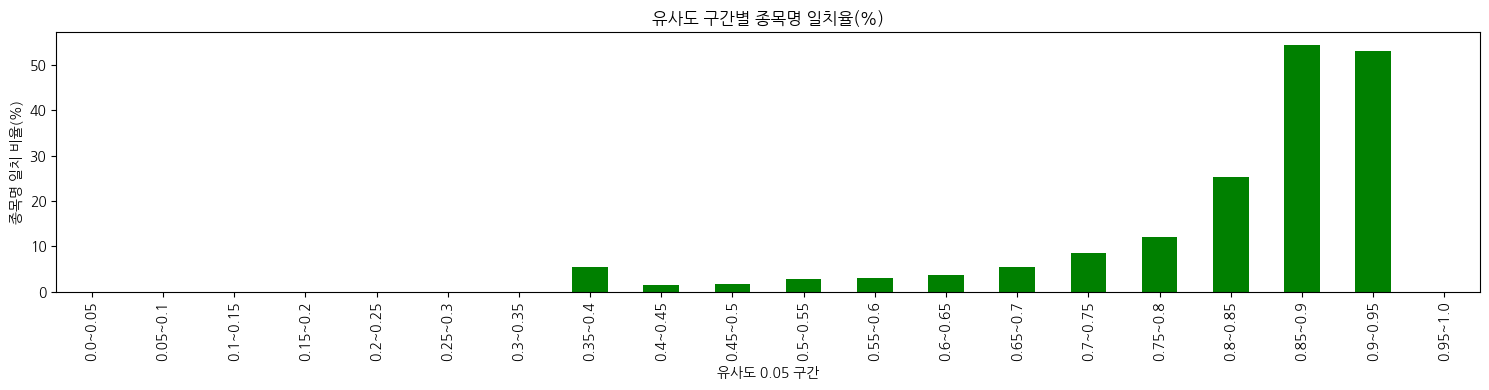

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,4))
match_ratio.plot(kind='bar', color='green')
plt.xlabel('유사도 0.05 구간')
plt.ylabel('종목명 일치 비율(%)')
plt.title('유사도 구간별 종목명 일치율(%)')
plt.tight_layout()
plt.show()

## 날짜 차이 분포 확인

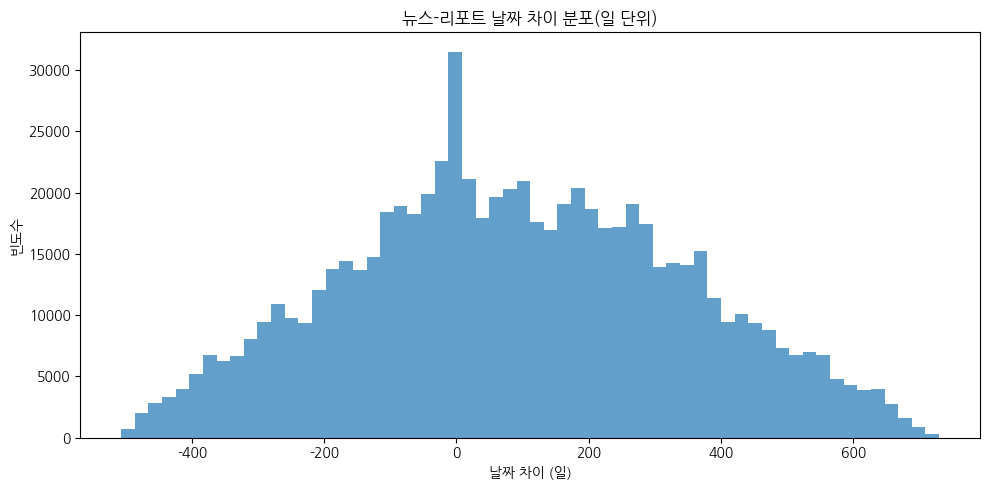

In [19]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(10,5))
plt.hist(result_df['date_diff_days'], bins=60, alpha=0.7)
plt.xlabel('날짜 차이 (일)')
plt.ylabel('빈도수')
plt.title('뉴스-리포트 날짜 차이 분포(일 단위)')
plt.tight_layout()
plt.show()

In [20]:
print(result_df['date_diff_days'].describe())

count    703960.000000
mean         90.450358
std         254.636398
min        -507.000000
25%         -91.000000
50%          80.000000
75%         275.000000
max         730.000000
Name: date_diff_days, dtype: float64


In [21]:
within_90_df = result_df[result_df['date_diff_days'].abs() <= 90]

# 일치 개수
same_stock_count = (within_90_df['stock_name'] == within_90_df['종목명']).sum()
# 전체 개수
total_count = len(within_90_df)
# 비율(%)
same_stock_ratio = same_stock_count / total_count * 100

print(f"±90일 이내 일치 개수: {same_stock_count}")
print(f"±90일 이내 전체 개수: {total_count}")
print(f"±90일 이내 일치 비율: {same_stock_ratio:.2f}%")

±90일 이내 일치 개수: 16196
±90일 이내 전체 개수: 185765
±90일 이내 일치 비율: 8.72%


In [22]:
# 전체 중 90일 이내 일치 비율
16196/47410 * 100

34.161569289179496

In [24]:
# stock_name = 종목명 일치 케이스들의 중요도
matched_df = within_90_df[within_90_df['stock_name'] == within_90_df['종목명']]
print(matched_df['impact_score'].describe())

count    16196.000000
mean        17.982644
std         11.133827
min          1.560000
25%         10.730000
50%         15.430000
75%         22.250000
max        141.860000
Name: impact_score, dtype: float64


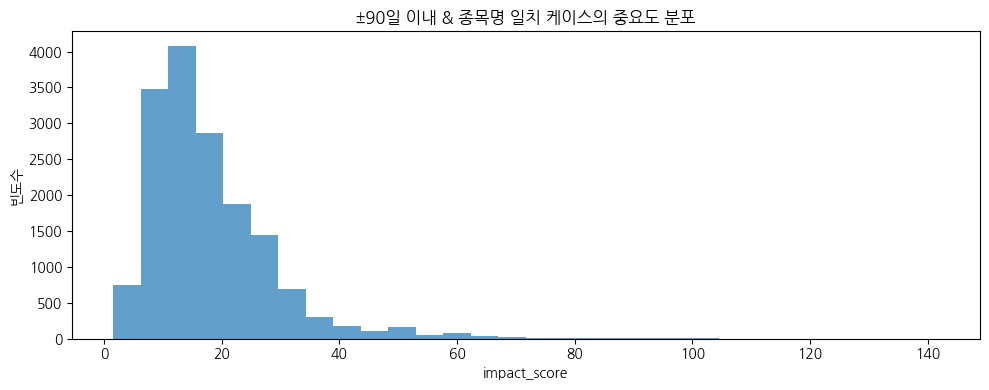

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.hist(matched_df['impact_score'], bins=30, alpha=0.7)
plt.xlabel('impact_score')
plt.ylabel('빈도수')
plt.title('±90일 이내 & 종목명 일치 케이스의 중요도 분포')
plt.tight_layout()
plt.show()

In [26]:
within_30_df = result_df[result_df['date_diff_days'].abs() <= 30]

In [27]:
# 일치 개수
same_stock_count_30 = (within_30_df['stock_name'] == within_30_df['종목명']).sum()
# 전체 개수
total_count_30 = len(within_30_df)
# 일치 비율(%)
same_stock_ratio_30 = same_stock_count_30 / total_count_30 * 100

print(f"±30일 이내 일치 개수: {same_stock_count_30}")
print(f"±30일 이내 전체 개수: {total_count_30}")
print(f"±30일 이내 일치 비율: {same_stock_ratio_30:.2f}%")

±30일 이내 일치 개수: 8174
±30일 이내 전체 개수: 73973
±30일 이내 일치 비율: 11.05%


In [28]:
8173/47410 *100

17.238979118329468

In [29]:
# 전체 일치 개수
total_same_stock_count = (result_df['stock_name'] == result_df['종목명']).sum()

# 30일 이내 + 종목명 일치 개수
same_stock_count_30 = ((result_df['date_diff_days'].abs() <= 30) & (result_df['stock_name'] == result_df['종목명'])).sum()

# 비율 계산
same_stock_30_ratio_of_total = same_stock_count_30 / total_same_stock_count * 100

print(f"전체 종목명 일치 개수: {total_same_stock_count}")
print(f"±30일 이내 종목명 일치 개수: {same_stock_count_30}")
print(f"전체 일치 개수 중 ±30일 이내 비율: {same_stock_30_ratio_of_total:.2f}%")

전체 종목명 일치 개수: 47411
±30일 이내 종목명 일치 개수: 8174
전체 일치 개수 중 ±30일 이내 비율: 17.24%


In [30]:
within_30_same_df = result_df[
    (result_df['date_diff_days'].abs() <= 30) &
    (result_df['stock_name'] == result_df['종목명'])
]

In [31]:
print(within_30_same_df['sim'].describe())

count    8174.000000
mean        0.729874
std         0.068445
min         0.434755
25%         0.688549
50%         0.741289
75%         0.775312
max         0.945880
Name: sim, dtype: float64


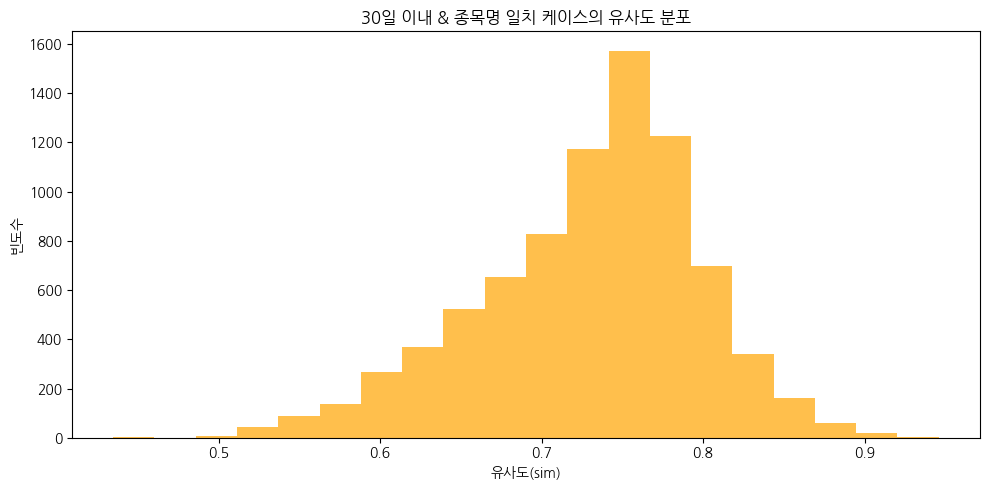

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.hist(within_30_same_df['sim'], bins=20, alpha=0.7, color='orange')
plt.xlabel('유사도(sim)')
plt.ylabel('빈도수')
plt.title('30일 이내 & 종목명 일치 케이스의 유사도 분포')
plt.tight_layout()
plt.show()

In [33]:
within_30_same_past_df = result_df[
    (result_df['date_diff_days'].abs() <= 30) &
    (result_df['stock_name'] == result_df['종목명']) &
    (result_df['date_diff_days'] <= 0)
]

In [34]:
print(within_30_same_past_df['sim'].describe())

count    5714.000000
mean        0.737757
std         0.068012
min         0.434755
25%         0.699941
50%         0.747675
75%         0.781685
max         0.945880
Name: sim, dtype: float64


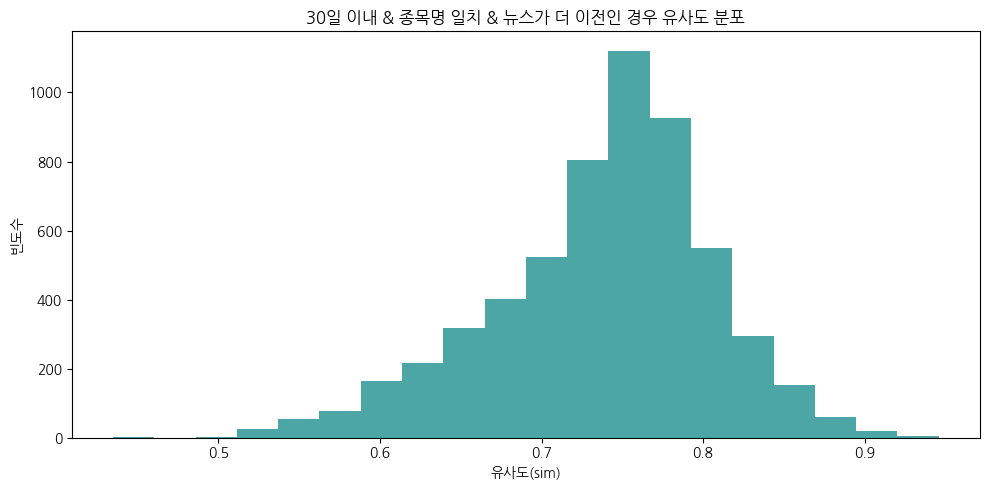

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.hist(within_30_same_past_df['sim'], bins=20, alpha=0.7, color='teal')
plt.xlabel('유사도(sim)')
plt.ylabel('빈도수')
plt.title('30일 이내 & 종목명 일치 & 뉴스가 더 이전인 경우 유사도 분포')
plt.tight_layout()
plt.show()

In [36]:
# 날짜 차이 0 이하 (뉴스가 리포트보다 과거)
n_past = (within_30_same_df['date_diff_days'] <= 0).sum()

# 날짜 차이 0 초과 (뉴스가 리포트보다 이후)
n_future = (within_30_same_df['date_diff_days'] >= 0).sum()

n_0 = (within_30_same_df['date_diff_days'] == 0).sum()

print(f"30일 이내 & 종목명 일치 & 날짜 차이 ≤ 0(뉴스가 더 과거): {n_past}개")
print(f"30일 이내 & 종목명 일치 & 날짜 차이 >= 0(뉴스가 더 미래): {n_future}개")
print(f"30일 이내 & 종목명 일치 & 날짜 차이 = 0 : {n_0}개")

30일 이내 & 종목명 일치 & 날짜 차이 ≤ 0(뉴스가 더 과거): 5714개
30일 이내 & 종목명 일치 & 날짜 차이 >= 0(뉴스가 더 미래): 4976개
30일 이내 & 종목명 일치 & 날짜 차이 = 0 : 2516개


In [37]:
5713/8173*100

69.90089318487703

## 뉴스별로 유사도 top3 리포트 추출
- 그 3개 중에 종목명 일치 리포트가 하나라도 있으면 “성공”
- 뉴스 전체에 대해 “성공률(Top-3 Recall)” 측정

In [38]:
import pandas as pd

# 뉴스별로 유사도 내림차순 정렬 후, 각 뉴스에 대해 상위 3개만 추출
result_df['sim_rank'] = result_df.groupby('news_id')['sim'].rank(method='first', ascending=False)
top3_df = result_df[result_df['sim_rank'] <= 3]

# 각 뉴스별로 "종목명 일치"가 하나라도 있는지 체크
top3_group = top3_df.groupby('news_id')
success_news = top3_group.apply(lambda x: (x['stock_name'] == x['종목명']).any())

# Top3 내 종목명 일치 성공률
top3_success_rate = success_news.mean() * 100
print(f"뉴스별 Top3 중 종목명 일치율: {top3_success_rate:.2f}%")
print(f"뉴스 전체 개수: {len(success_news)}")
print(f"Top3에 종목명 일치 리포트가 있는 뉴스 개수: {success_news.sum()}")

뉴스별 Top3 중 종목명 일치율: 19.60%
뉴스 전체 개수: 35198
Top3에 종목명 일치 리포트가 있는 뉴스 개수: 6898


<ipython-input-38-e875df7bd7e3>:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  success_news = top3_group.apply(lambda x: (x['stock_name'] == x['종목명']).any())


### 뉴스별 top3 종목명 정답(일치) 개수 분포

In [39]:
# Top3만 추출 (sim_rank 필요)
result_df['sim_rank'] = result_df.groupby('news_id')['sim'].rank(method='first', ascending=False)
top3_df = result_df[result_df['sim_rank'] <= 3]

# 뉴스별 Top3 내 정답(종목명 일치) 개수 카운트
top3_group = top3_df.groupby('news_id')
top3_match_count = top3_group.apply(lambda x: (x['stock_name'] == x['종목명']).sum())
print(top3_match_count.value_counts().sort_index())

0    28300
1     3654
2     1878
3     1366
Name: count, dtype: int64


<ipython-input-39-1f6d07820910>:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top3_match_count = top3_group.apply(lambda x: (x['stock_name'] == x['종목명']).sum())


In [40]:
28300+3654+1878+1366

35198

### Top3 내 리포트의 유사도/날짜차이/impact_score 분포

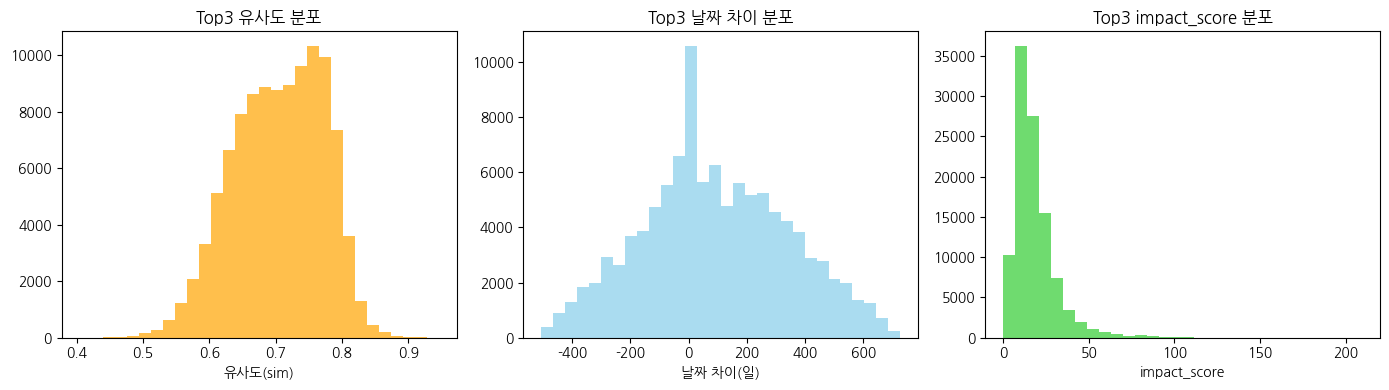

In [47]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 4))
plt.subplot(1, 3, 1)
plt.hist(top3_df['sim'], bins=30, color='orange', alpha=0.7)
plt.xlabel('유사도(sim)')
plt.title('Top3 유사도 분포')

plt.subplot(1, 3, 2)
plt.hist(top3_df['date_diff_days'], bins=30, color='skyblue', alpha=0.7)
plt.xlabel('날짜 차이(일)')
plt.title('Top3 날짜 차이 분포')

plt.subplot(1, 3, 3)
plt.hist(top3_df['impact_score'], bins=30, color='limegreen', alpha=0.7)
plt.xlabel('impact_score')
plt.title('Top3 impact_score 분포')
plt.tight_layout()
plt.show()

### Top3에 정답(일치) 2개 이상 들어가는 뉴스 개수/비율

In [43]:
n_two_or_more = (top3_match_count >= 2).sum()
n_total_news = top3_match_count.shape[0]
print(f"Top3에 정답 2개 이상인 뉴스 개수: {n_two_or_more} / {n_total_news}")
print(f"비율: {n_two_or_more / n_total_news * 100:.2f}%")

Top3에 정답 2개 이상인 뉴스 개수: 3244 / 35198
비율: 9.22%


### Precision@K, Hit@K(Recall@K) 직접 계산
- Precision@K : Top3의 정답 비율 (K=3 기준, 전체 평균)
- Hit@K/Recall@K: 뉴스별 Top3 중에 정답이 하나라도 포함된 뉴스 비율(=Hit Rate)

In [44]:
K = 3

# Precision@3: 뉴스별 Top3에서 정답 개수 평균
precision_at_k = top3_match_count.mean() / K * 100
print(f"Precision@{K}: {precision_at_k:.2f}%")

# Hit@3(Recall@3): 뉴스별 Top3에 정답 1개 이상 포함된 뉴스 비율
hit_at_k = (top3_match_count > 0).mean() * 100
print(f"Hit@{K} (Recall@{K}): {hit_at_k:.2f}%")

Precision@3: 10.90%
Hit@3 (Recall@3): 19.60%


### 구간별 Precision@3, Hit@3(Recall@3) 측정
- Precision@3이 높을수록: 사용자에게 “추천된 리포트가 종목 일치일 확률이 높아짐(신뢰도↑)"
- Hit@3(Recall@3)이 높을수록: “뉴스 하나당 Top3에서 정답을 건질 확률”이 높아짐(서비스 효용↑)"

In [48]:
thresholds = [0.75, 0.8, 0.85, 0.9]
for th in thresholds:
    filtered = top3_df[top3_df['sim'] >= th]
    grouped = filtered.groupby('news_id')
    match_count = grouped.apply(lambda x: (x['stock_name'] == x['종목명']).sum())
    precision_at_3 = match_count.mean() / 3 * 100
    hit_at_3 = (match_count > 0).mean() * 100
    print(f"유사도 {th} 이상 - Precision@3: {precision_at_3:.2f}%, Hit@3(Recall@3): {hit_at_3:.2f}%")

<ipython-input-48-2ca8e21d4048>:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  match_count = grouped.apply(lambda x: (x['stock_name'] == x['종목명']).sum())


유사도 0.75 이상 - Precision@3: 16.50%, Hit@3(Recall@3): 29.26%
유사도 0.8 이상 - Precision@3: 17.96%, Hit@3(Recall@3): 36.73%
유사도 0.85 이상 - Precision@3: 20.23%, Hit@3(Recall@3): 52.77%
유사도 0.9 이상 - Precision@3: 17.71%, Hit@3(Recall@3): 53.12%


<ipython-input-48-2ca8e21d4048>:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  match_count = grouped.apply(lambda x: (x['stock_name'] == x['종목명']).sum())
<ipython-input-48-2ca8e21d4048>:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  match_count = grouped.apply(lambda x: (x['stock_name'] == x['종목명']).sum())
<ipython-input-48-2ca8e21d4048>:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grou

0.85 : Top3 중 최소 1개가 종목 일치인 뉴스가 절반 이상이니까 실무에서도 많이 쓰는 커트라인

## 결론

In [53]:
filtered_date_sim_df = top3_df[
    (top3_df['sim'] >= 0.85) &
    (top3_df['date_diff_days'] >= -90) &  # 날짜 차이: -90 이상
    (top3_df['date_diff_days'] <= 0)      # 날짜 차이: 0 이하
]

print(f"필터링 후 데이터 개수: {len(filtered_date_sim_df)}")
filtered_date_sim_df.head(10)

필터링 후 데이터 개수: 353


,news_id,wdate,stock_name,news_title,news_content,report_id,작성일,종목명,report_title,report_content,impact_score,sim,date_diff_days,sim_bin_05,is_same_stock,sim_rank,sim_bin
840,20250523_0078,2025-05-23 08:40:00,삼성바이오로직스,"삼성물산, 삼바 인적분할로 바이오 사업가치 높아질 것-유진",삼성바이오로직스 인적분할 후 지배구조. /자료=유진투자증권\n삼성물산이 자회사인 삼...,20250523_0029,2025-05-23,삼성물산,바이오 사업 가치의 재발견,삼성바이오에피스 분할 후의 그림이 중요\n삼성바이오로직스는 삼성바이오에피스를 인적 ...,9.65,0.910080,0,0.9~0.95,False,1.0,0.9~0.95
3040,20250522_0152,2025-05-22 08:06:00,SK,"한국금융지주, 레버리지 기반 실적 개선 기대…밸류 매력 높아-SK",[이데일리 신하연 기자] SK증권은 한국금융지주(071050)에 대해 적극적인 레버...,20250522_0010,2025-05-22,한국금융지주,높은 레버리지에 기반한 실적 개선 기대감,적극적인 레버리지 활용에 기반한 이익 체력 기대감\n한국금융지주의 핵심 자회사인 한...,20.13,0.864946,0,0.85~0.9,False,1.0,0.85~0.9
3160,20250522_0165,2025-05-22 07:41:00,현대글로비스,"[클릭 e종목]""현대글로비스, 관세·입항세 우려는 시간문제""",대신증권이 22일 현대글로비스에 대해 관세와 미국 무역대표부(USTR) 규제에 따른...,20250522_0004,2025-05-22,현대글로비스,우려에는 동감. 그래도 사자,"투자의견 매수, 목표주가 170,000원 유지\n현대글로비스는 2025년 1분기 사...",6.47,0.869759,0,0.85~0.9,True,1.0,0.85~0.9
4380,20250521_0126,2025-05-21 08:27:00,삼성전자,"“삼성전자, 하반기 체질 개선 가능성에 무게”…목표가↑",[사진출처 = 연합뉴스]\n대신증권은 21일 삼성전자에 대해 올해 하반기로 갈수록 ...,20250521_0008,2025-05-21,삼성전자,변화를 위한 거인의 발걸음,"투자의견 매수, 목표주가 74,000원\nValuation 부담도, 더 이상 표출될...",5.74,0.868969,0,0.85~0.9,True,1.0,0.85~0.9
8320,20250519_0122,2025-05-19 09:01:00,미래에셋증권,"미래에셋증권, 1분기 실적 기대치 상회…목표주가↑-유안타",미래에셋증권 CI /사진=미래에셋증권\n유안타증권이 미래에셋증권의 목표주가를 기존 ...,20250519_0027,2025-05-19,미래에셋증권,"해외수수료, WM, 해외법인 삼박자","1Q25 순이익 컨센서스 상회\n미래에셋증권의 1Q25 지배주주순이익은 2,587억...",33.41,0.867944,0,0.85~0.9,True,1.0,0.85~0.9
15760,20250514_0173,2025-05-14 07:45:00,유진투자증권,"[클릭 e종목]""신테카바이오, AI 의료 매출 본격화…데이터센터 서비스도 가시화""",유진투자증권은 14일 신테카바이오에 대해 인공지능(AI) 의료 매출이 본격화되고 데...,20250514_0045,2025-05-14,신테카바이오,1Q25 Review: AI의료 매출 발생 본격화,I. 1Q25 Review & 투자전략\n전일(05/13) 발표한 1분기 실적(연결...,23.62,0.873106,0,0.85~0.9,False,1.0,0.85~0.9
19480,20250512_0163,2025-05-12 07:51:00,대신증권,"[클릭 e종목]""씨앤씨인터내셔널, 신제품 폭풍 성장 가능…주가 저평가""",대신증권은 12일 씨앤씨인터내셔널에 대해 올 2분기부터 실적이 회복되기 시작해 상저...,20250512_0019,2025-05-12,씨앤씨인터내셔널,회복ing...,"투자의견 BUY 유지하나 목표주가 40,000원(-7%)으로 하향 조정\n높은 기저...",23.44,0.861320,0,0.85~0.9,False,1.0,0.85~0.9
23980,20250508_0175,2025-05-08 07:46:00,롯데칠성,"롯데칠성, 실적 회복 제한적이지만 저가 매수 유효-대신",[이데일리 신하연 기자] 대신증권은 롯데칠성(005300)에 대해 고환율로 원가 부...,20250508_0020,2025-05-08,롯데칠성,내수 부진의 그늘,"투자의견 BUY 유지하나, 목표주가 140,000원(-7%)으로 하향\n국내 소비가...",7.05,0.860992,0,0.85~0.9,True,1.0,0.85~0.9
28360,20250502_0087,2025-05-02 08:18:00,삼성전자,"삼성전자, ""HBM 기대감 낮지만 편안한 구간…매수 유지""-하나",하나증권은 삼성전자가 올해 1분기 실적이 예상에 부합했다고 2일 밝혔다. 투자의견 ...,20250502_0048,2025-05-02,삼성전자,메모리 우상향에 집중한 투자 전략 필요,1Q25 Review: MX 부문의 견조한 이익\n삼성전자의 25년 1분기 세부 실...,8.29,0.889883,0,0.85~0.9,True,1.0,0.85~0.9
28600,20250502_0100,2025-05-02 07:53:00,SK,"SK이노베이션, 석유·화학 적자 지속 불가피…목표가 24%↓-iM",[이데일리 신하연 기자] iM증권은 SK이노베이션(096770)에 대해 유가 하락으...,20250502_0072,2025-05-02,SK이노베이션,E&S 합병효과가 무색했던 실적,"목표주가 13만원 하향, 투자의견 매수 유지\n동사에 대한 목표주가를 13만원으로 ...",23.54,0.894336,0,0.85~0.9,False,1.0,0.85~0.9


In [54]:
print("result_df 전체 rows:", len(result_df))
if 'sim_rank' in result_df.columns:
    print("Top3만 남긴 상태인가?", (result_df['sim_rank'] <= 3).sum())

# 필터링 전에, 혹시 Top3만 남겨둔 df를 또 조건필터하고 있진 않은지?

result_df 전체 rows: 703960
Top3만 남긴 상태인가? 105594


In [55]:
# 1. 전체 매칭에서 바로 조건 필터
filtered_df = result_df[
    (result_df['sim'] >= 0.85) &
    (result_df['date_diff_days'] >= -90) &
    (result_df['date_diff_days'] <= 0)
]
print("조건 필터링 결과:", len(filtered_df))

# 2. 뉴스별 Top3만 남기려면 그 이후 rank로 필터
filtered_df['sim_rank'] = filtered_df.groupby('news_id')['sim'].rank(method='first', ascending=False)
top3_filtered_df = filtered_df[filtered_df['sim_rank'] <= 3]
print("필터 후 Top3:", len(top3_filtered_df))

조건 필터링 결과: 355
필터 후 Top3: 355


<ipython-input-55-08bf6fce48c0>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['sim_rank'] = filtered_df.groupby('news_id')['sim'].rank(method='first', ascending=False)
